In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from wind_tools import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)

# Filter wind dir
test that filter_wind_dir works as intended

In [ ]:
wdirs = np.arange(0, 360)
wdirs = pd.DataFrame(wdirs, columns=['wind_dir'])

In [ ]:
filter_by_wind_dir(wdirs, 10, 10).to_numpy()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
exp = np.full((360), False, dtype=np.bool)
exp[1:20] = True
exp[181:200] = True

In [ ]:
assert (exp == filter_by_wind_dir(wdirs, 10, 10).to_numpy()).all()

# Vectors Rotation
Test and understand how rotation works
```
def rotate_ang(data, ang: DegAng):
    """naive (but working) approach to rotate the u and v componets by given angles"""
    wind_dir, wind_speed = cart2pol(data[:, 0], data[:, 1])
    wind_dir += np.deg2rad(ang)
    return np.column_stack(pol2cart(wind_dir, wind_speed))```
    

In [ ]:
def plot_vecs(vecs):
    plt.quiver([0,0], [0,0], vecs[:,0], vecs[:,1], color=['r', 'g'], scale=4)

In [ ]:
def add_rot(data, ang):
    return np.vstack([data, rotate_ang(data, ang)])

In [ ]:
#create a 45° vector
data1 = np.full((1,2), 1)
data1

array([[1, 1]])

In [ ]:
data1 = add_rot(data1, 45)

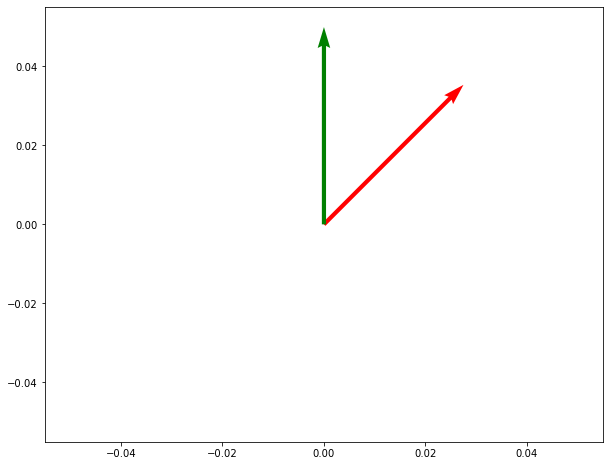

In [ ]:
plot_vecs(data1)

In [ ]:
assert np.allclose(data1[1], [0, 1.4142])

In [ ]:
data2 = np.array([[0,1]])
data2

array([[0, 1]])

In [ ]:
data2 = add_rot(data2, -45)

In [ ]:
data2

array([[0.        , 1.        ],
       [0.70710678, 0.70710678]])

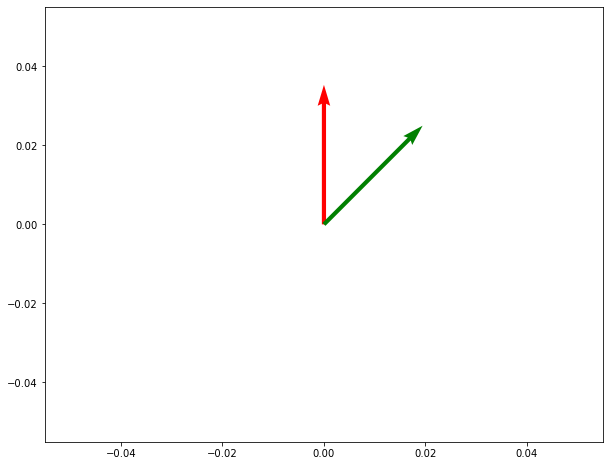

In [ ]:
plot_vecs(data2)

In [ ]:
assert np.allclose(data2[1], [0.7071, 0.7071])